# Which customer Accepts Bank's Term Deposit?

![image](Images/bank_marketing.jpg)

## 1. Project Description

#### This project aims to predict whether a client will subscribe to a bank term deposit based on historical data from direct marketing campaigns conducted by a Portuguese banking institution. The dataset contains various attributes related to the clients' demographic information, banking history, and details about the marketing campaign.

#### The aim is to develop a classification model that can help the bank target potential customers more effectively, thereby increasing the success rate of their marketing campaigns.

## 2. Dataset Understanding

The dataset used for this project is `bank-full.csv`, [Download](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains data from direct marketing campaigns. The dataset consists of 17 input variables and one target variable `y`. The target variable `y` indicates whether a client has subscribed to a term deposit `yes` or not `no`.

* The dataset consists of 4521 records.
* the dataset does not have missing values

### 2.1. The variables/Features used for this project are:

1. `age` which is an integer
2. `job` which explains the type of job (categorical: `admin`,`blue-collar`,`entrepreneur`,`housemaid`,`management`,`retired`,`self-employed`,`services`,`student`,`technician`,`unemployed`,`unknown`)
3. `marital` which is marital status (categorical: `divorced`,`married`,`single`,`unknown`; note: 'divorced' means divorced or widowed)
4. `default` which explains if the customer has credit in default - Binary
5. `balance` which is the average yearly balance - Integer
6. `housing` which is if the customer has housing loan - binary
7. `loan` which is if the client has personal loan - binary
8. `campaign` which is the number of contacts performed during this campaign and for this client (numeric, includes last contact)
9. `poutcome` explains the outcome of the previous marketing campaign (categorical: `failure`,`nonexistent`,`success`)
10. `y` which is the target. has the client subscribed a term deposit?

## 3. Data Understanding and Preprocessing

### 3.1 Importing Libraries

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### 3.2 Load dataset

In [2]:
# loading the dataset

# relevant columns
selected_columns = ['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan', 'campaign', 'poutcome', 'y']

# Load the dataset
data = pd.read_csv('Data/bank-full.csv', delimiter=';', usecols=selected_columns)

# Display the first 5 rows of the dataframe
data.head()

,age,job,marital,default,balance,housing,loan,campaign,poutcome,y
0,58,management,married,no,2143,yes,no,1,unknown,no
1,44,technician,single,no,29,yes,no,1,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,1,unknown,no
3,47,blue-collar,married,no,1506,yes,no,1,unknown,no
4,33,unknown,single,no,1,no,no,1,unknown,no


In [3]:
data.shape

(45211, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   marital   45211 non-null  object
 3   default   45211 non-null  object
 4   balance   45211 non-null  int64 
 5   housing   45211 non-null  object
 6   loan      45211 non-null  object
 7   campaign  45211 non-null  int64 
 8   poutcome  45211 non-null  object
 9   y         45211 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


the dataset has no null values

### 3.3 Visualizing outcome distribution

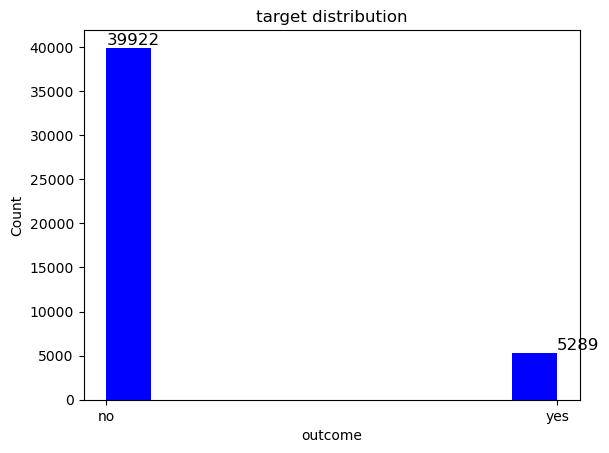

In [5]:
plt.hist(data.y, color='blue')
plt.title('target distribution')
plt.xlabel('outcome')
plt.ylabel('Count')

# Add value counts on top of the bars
value_counts = data['y'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), va='bottom', fontsize=12)

plt.show()

From the distribution, the number of `yes` is 521 which is 11.7% of the whole dataset. Meaning the data is highly imbalanced to the no outcomes and a model can be 89% right by classifying all as `no` which will not be a good outcome.

We will apply `SMOTE` from `imblearn` module to handle the class imbalance

### 3.4 Visualizing the age distibution of the clients

C:\Users\Floyed\AppData\Local\Temp\ipykernel_4852\3805640322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, color='blue')


<Axes: xlabel='age', ylabel='Density'>

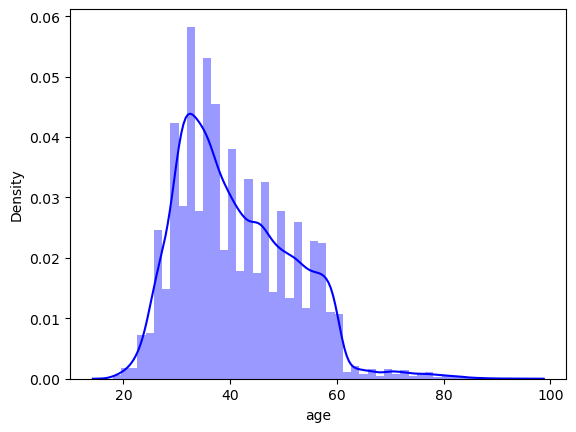

In [6]:
sns.distplot(data.age, color='blue')

### 3.5 distribution of job categories

In [7]:
jobs= pd.crosstab(data['job'], data['y'])
jobs

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


<Axes: xlabel='job'>

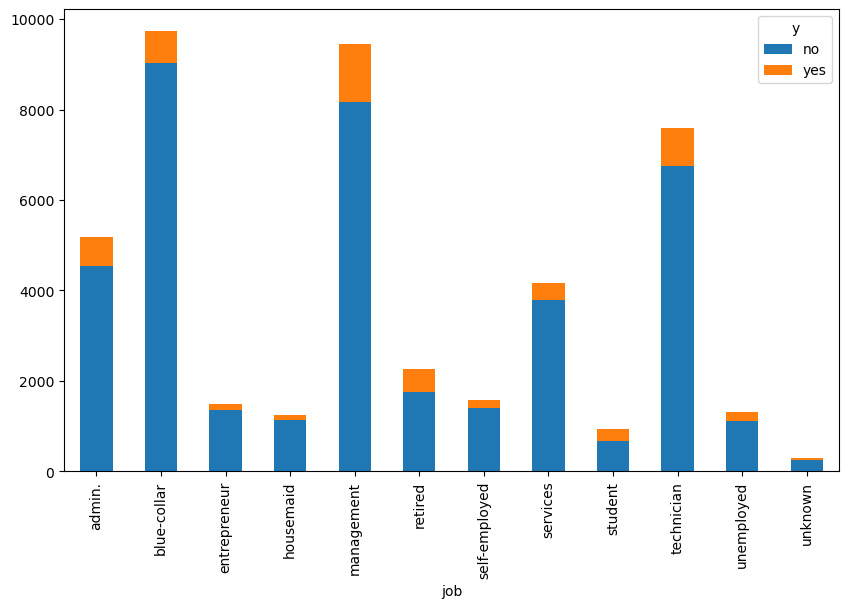

In [8]:
jobs.plot.bar(stacked=True, figsize=(10,6))

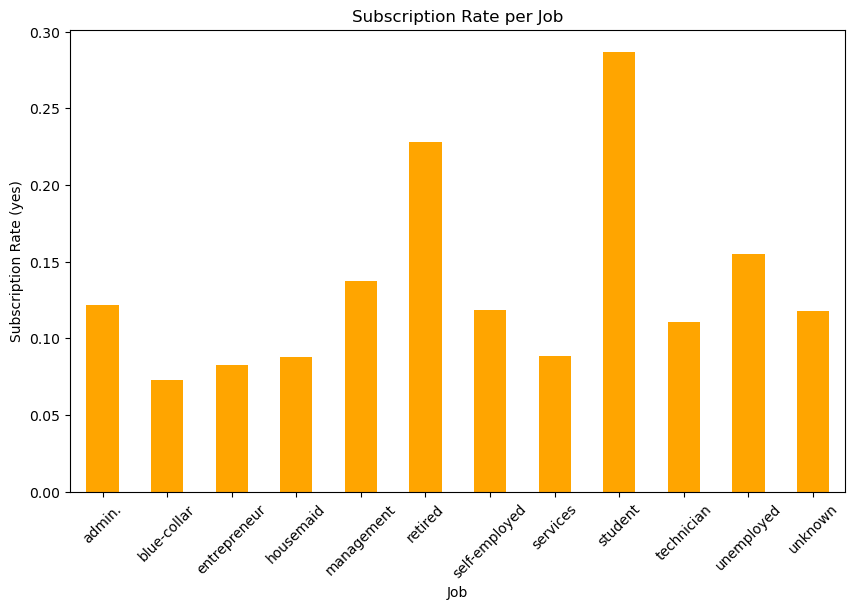

In [9]:
subscription_rate = data.groupby('job')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 6))
subscription_rate['yes'].plot(kind='bar', color='orange')
plt.title('Subscription Rate per Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate (yes)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

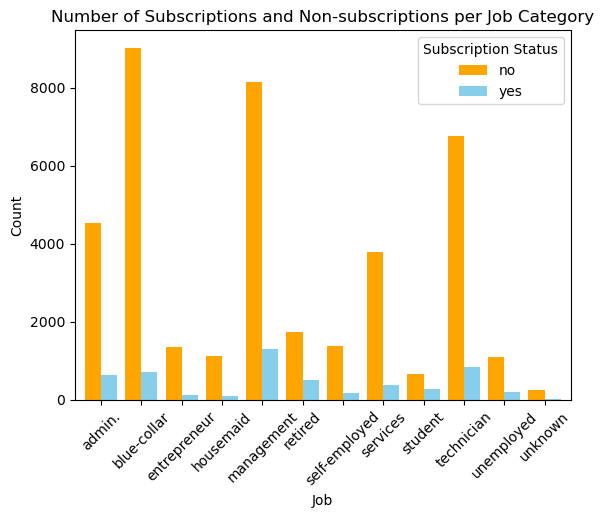

In [10]:
# Count the number of 'yes' and 'no' for each job category
job_subscription_counts = data.groupby('job')['y'].value_counts().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
job_subscription_counts.plot(kind='bar', stacked=False, color=['orange', 'skyblue'], width=0.8)
plt.title('Number of Subscriptions and Non-subscriptions per Job Category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.show()

In [11]:
marital = pd.crosstab(data['marital'], data['y'])
marital

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


<Axes: xlabel='marital'>

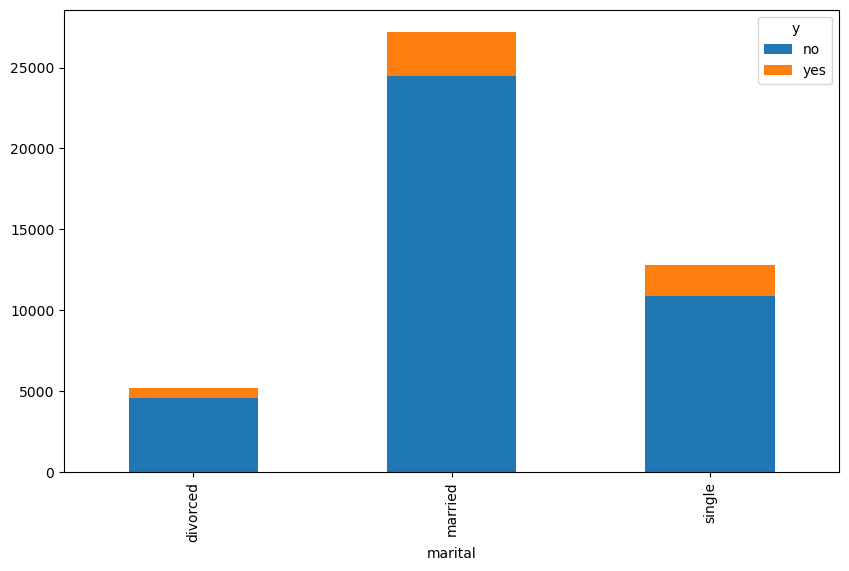

In [12]:
marital.plot.bar(stacked=True, figsize=(10, 6))

In [13]:
poutcome = pd.crosstab(data['poutcome'], data['y'])
poutcome

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


<Axes: xlabel='poutcome'>

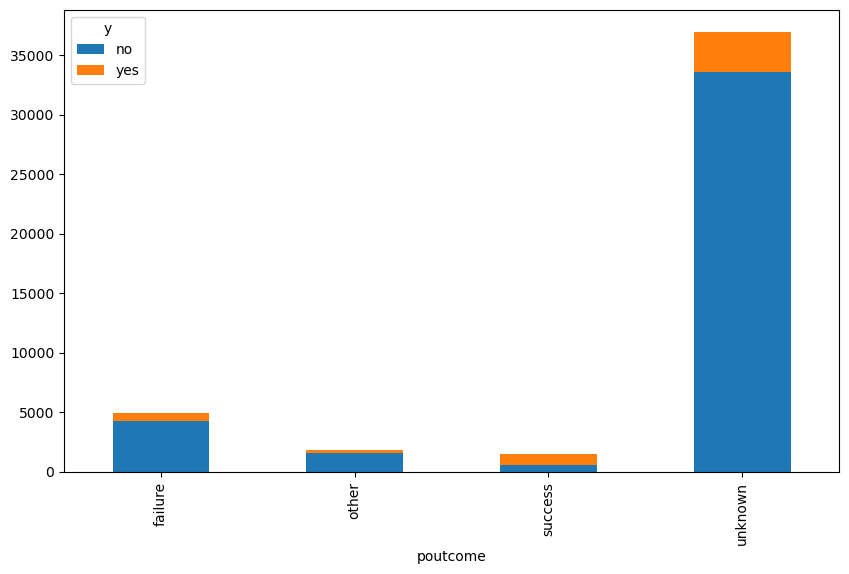

In [14]:
poutcome.plot.bar(stacked=True, figsize=(10,6))

In [15]:
campaigns = pd.crosstab(data['campaign'], data['y'])
campaigns

y,no,yes
campaign,,
1,14983,2561
2,11104,1401
3,4903,618
4,3205,317
5,1625,139
6,1199,92
7,688,47
8,508,32
9,306,21


In [16]:
default = pd.crosstab(data['default'], data['y'])

# Calculate the acceptance rate (the percentage of "yes" subscriptions)
default['acceptance_rate'] = default['yes'] / (default['yes'] + default['no']) * 100

default

y,no,yes,acceptance_rate
default,,,
no,39159,5237,11.796108
yes,763,52,6.380368


In [17]:
loan = pd.crosstab(data.loan, data.y)

# Calculate the acceptance rate (the percentage of "yes" subscriptions)
loan['acceptance_rate'] = loan['yes'] / (loan['yes'] + loan['no']) * 100

loan

y,no,yes,acceptance_rate
loan,,,
no,33162,4805,12.655727
yes,6760,484,6.681391


## 4 Target and features splitting

### 4.1 features and target

In [18]:
# Define features and target
X = data.drop('y', axis=1)
y = data['y']

### 4.2 test-train split

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 One Hot Encoding

In [20]:
# Encoding categorical variables
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

### 4.4 Apply smote to handle the class imbalance

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class

In [21]:
# Apply SMOTE for class imbalance

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

### 4.5 Scaling Numerical Features

In [22]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_encoded)

## 5 Modelling

## 5.1 Baseline Model - Logistic Regression

Logistic Regression is a good starting point as a baseline model due to its simplicity and interpretability.

In [24]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

### 5.1.1 Baseline Model evaluation

In [25]:
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.88      0.89      7952
         yes       0.27      0.33      0.30      1091

    accuracy                           0.81      9043
   macro avg       0.59      0.60      0.60      9043
weighted avg       0.83      0.81      0.82      9043

Confusion Matrix:
[[6998  954]
 [ 732  359]]
ROC AUC Score: 0.6856655515125585


### baseline model evaluation


Precision:
* No: 0.91
* Yes: 0.19
    * The model is highly accurate at predicting 'no' outcomes (91%) but performs poorly for 'yes' outcomes (19%). This indicates that the model is not effective at identifying positive cases.


Recall
* No: 0.87
* Yes: 0.26
    * The model is better at identifying 'no' outcomes (87%) but only identifies 26% of the 'yes' outcomes. This suggests that the model is missing a lot of the positive cases.

* The model has a high F1-score for 'no' (0.89) but a very low F1-score for 'yes' (0.22), which indicates that the model's performance is significantly weaker for predicting the 'yes' class.

* The accuracy of the model is 80%, which seems high. However, due to the class imbalance (more 'no' outcomes), accuracy can be misleading. A model could achieve high accuracy by simply predicting the majority class ('no').

#### Confusion Matrix
The confusion matrix confirms that the model has a high number of false positives and false negatives. This contributes to the poor recall and precision for the 'yes' class.

#### ROC AUC Score
* A score of 0.65 indicates that the model has some discriminative power but is not performing very well.
* A score closer to 1.0 would indicate a better model.

## 5.2 Advanced model - Decision Tree

Decision tree calssifier is a complex model and fit for non-liniear relationships

In [26]:
#Innitialize the model

decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=2, criterion='entropy', random_state=42)

In [27]:
# Train the Decision Tree

decision_tree.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [28]:
#make predictions

y_pred = decision_tree.predict(X_test_scaled)

### 5.2.1 decision tree Model Evaluation

In [29]:
# Evaluate the model's performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.86      0.88      7952
         yes       0.24      0.34      0.28      1091

    accuracy                           0.79      9043
   macro avg       0.57      0.60      0.58      9043
weighted avg       0.82      0.79      0.81      9043



In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[6803 1149]
 [ 721  370]]


In [31]:
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.6719278203593698


### 5.2.2 Analysis and conclusions

#### Precision:

No: 0.91 this is a high precision; indicating that when the model predicts "no," mostly correctly
Yes: 0.23 this is a low precision; indicating that when the model predicts "yes," often incorrectly

#### Recall:

No: 0.87 means that the model correctly identifies 87% of the "no" cases
Yes: 0.32 means that the model correctly identifies 32% of the "yes" cases

#### Accuracy
0.81 overall, 81% of the predictions are correct

#### ROC AUC Score: 0.662
This model is performing quite well in distinguishing between the two classes. higher than that of logistic model

## Conclusions

![image](Images/perfomance.jpg)

#### Improved Recall and F1-Score:
The Decision Tree model shows a slight improvement in recall and F1-score for the "yes" class compared to the Logistic Regression model. This suggests that the Decision Tree is better at identifying the "yes" cases (true positives) than Logistic Regression.

#### Higher ROC AUC Score:
The Decision Tree model has a higher ROC AUC score (0.662) compared to the Logistic Regression model (0.647). This indicates better overall performance in distinguishing between the "yes" and "no" classes.